In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain 
from operator import itemgetter

## Driving times 

In [2]:
df = pd.read_csv("../data/experiment/all_scenarios.csv").drop(columns=['Unnamed: 0'])
df.head()

,prob_A,prob_B,prob_C,prob_D,Run,Average driving time,Probs,Worst bridge delay,Worst bridge name
0,0.0,0.0,0.0,0.0,0,387.226003,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,bridge at id 1004
1,0.0,0.0,0.0,0.0,1,387.441454,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,bridge at id 1004
2,0.0,0.0,0.0,0.0,2,387.489698,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,bridge at id 1004
3,0.0,0.0,0.0,0.0,3,387.238692,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,bridge at id 1004
4,0.0,0.0,0.0,0.0,4,385.501432,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,bridge at id 1004


In [4]:
df_result = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Average driving time"].mean()
    maxx = df.iloc[x:(x+10)]["Average driving time"].max()
    minn = df.iloc[x:(x+10)]["Average driving time"].min()
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    # incldue min and max values with hue="Average driving time", for seaborn to plot shaded areas (see plot below)
    min_fill = pd.DataFrame([[scenario,"Average driving time", maxx]], columns = ["Scenario", "Variable", "Time"])
    max_fill = pd.DataFrame([[scenario,"Average driving time", minn]], columns = ["Scenario", "Variable", "Time"])
    # include min and max values again with correct hues, for seaborn to plot distinct min and max plot lines (see plot below)
    '''dfmin = pd.DataFrame([[scenario,"Minimum driving time", minn]], columns =["Scenario", "Variable", "Time"])
    dfmax = pd.DataFrame([[scenario,"Maximum driving time", maxx]], columns =["Scenario", "Variable", "Time"])'''

    df_result = df_result.append(min_fill)
    df_result = df_result.append(dfAve)
    df_result = df_result.append(max_fill)
    '''df_result = df_result.append(dfmin)
    df_result = df_result.append(dfmax)'''

df_result.head()

C:\Users\nachi\AppData\Local\Temp\ipykernel_17100\3727242917.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(min_fill)
C:\Users\nachi\AppData\Local\Temp\ipykernel_17100\3727242917.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(dfAve)
C:\Users\nachi\AppData\Local\Temp\ipykernel_17100\3727242917.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(max_fill)
C:\Users\nachi\AppData\Local\Temp\ipykernel_17100\3727242917.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(min_fill)
C:\Users\nachi\AppData\Local\Temp\i

,Scenario,Variable,Time
0,0,Average driving time,389.241798
0,0,Average driving time,387.251584
0,0,Average driving time,385.501432
0,1,Average driving time,435.944689
0,1,Average driving time,411.143032


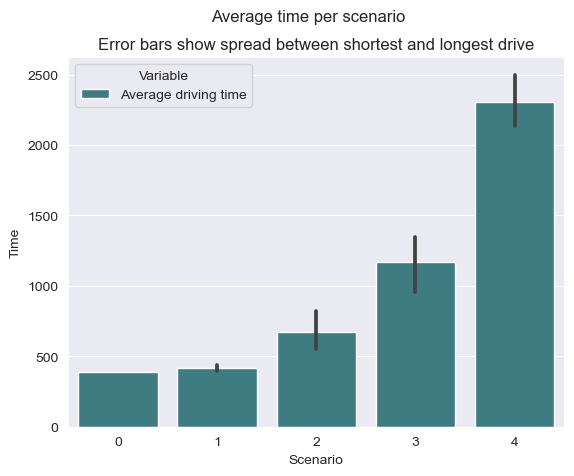

In [5]:
sns.set_style('darkgrid')
sns.barplot(x='Scenario', y='Time', hue='Variable', data=df_result, palette='crest')


# fill space between minimum and maximum drive time 
#ax.fill_between(df_result,
 #               y1=df_result.loc[(df_result['Variable']=='Minimum driving time')].drop(columns=['Scenario','Variable']))#,
               # y2=df_result.loc[(df_result['Variable']=='Maximum driving time')].drop(columns=['Scenario','Variable']))
plt.suptitle('Average time per scenario')
plt.title('Error bars show spread between shortest and longest drive')
plt.savefig('driving_time.png')

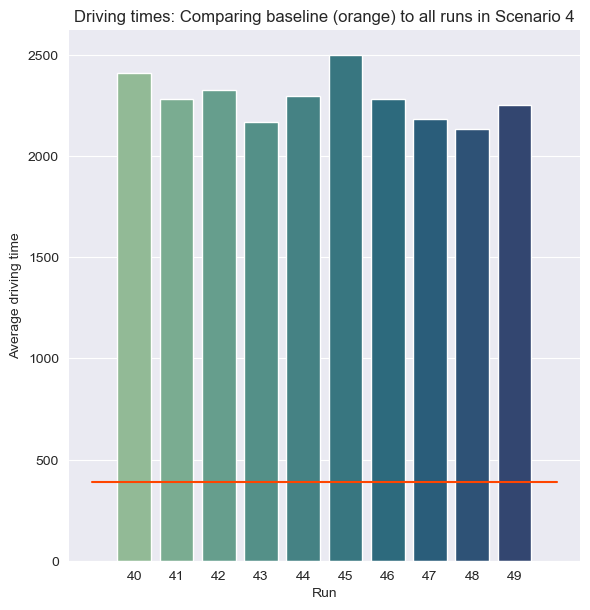

In [6]:
g = sns.catplot(
    data=df.tail(10), kind="bar",
    x="Run", y="Average driving time", errorbar="sd", palette="crest", alpha=1, height=6)
g.despine(left=True)
g.set_axis_labels("Run", "Average driving time")
sns.lineplot(x = [-1,10], y=387.251584, color='orangered')
plt.title('Driving times: Comparing baseline (orange) to all runs in Scenario 4')
plt.savefig('scenarios_one_eight.png')

## Delay Time 

In [7]:
df_delay = pd.read_csv("../data/experiment/all_scenarios.csv").drop(columns=['Unnamed: 0','prob_A','prob_B','prob_C','prob_D','Run','Probs'])

In [8]:
scenario = list([[i]*10 for i in range(0,5)])
scenario = list(chain.from_iterable(scenario))
df_delay['Scenario'] = scenario

In [9]:
df_delay = df_delay.rename(columns={'Worst bridge delay':'delay time'})

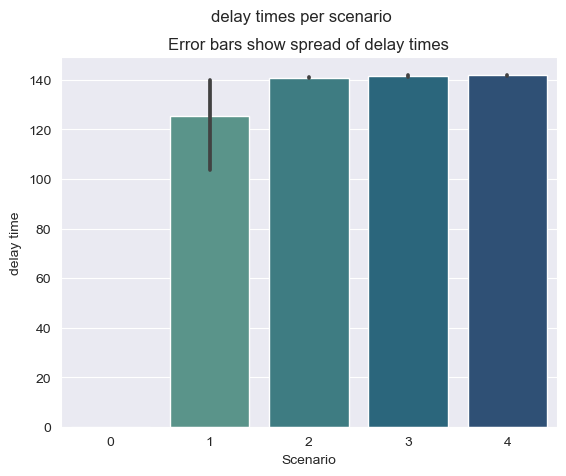

In [10]:
sns.barplot(x='Scenario',y='delay time', data=df_delay, palette='crest');
plt.suptitle('delay times per scenario')
plt.title('Error bars show spread of delay times')
plt.savefig('delay_time.png')

## Bridges

In [11]:
df = pd.read_csv("../data/experiment/all_scenarios.csv").drop(columns=['Unnamed: 0'])
df_sorted = df.sort_values(by = "Worst bridge delay", ascending=False).drop_duplicates(subset = 'Worst bridge name')
df_sorted.shape

(36, 9)

In [12]:
df_bridge_count = df[df["Worst bridge delay"] != 0]
df_bridge_count = df_bridge_count['Worst bridge name'].value_counts()
df_bridge_count

NORTH NAGDA SLAB CULVERT        2
SHOMO PUR BOX CULVERT           2
SHATORA RCC GIDER BRIDGE        2
OKYIA STATION                   2
MANDAR GRAM BOX CULVERT         2
NABAKALASH                      1
LAXMISORA BRIDGE                1
PACH GORIA SLAB CULVERT         1
POLARGHAT BAZAR BRIDGE          1
ROJUBPUR BRIDGE BOX CULVERT     1
SHANTIR HAT                     1
UKLIA-SHAHABMARKAT              1
Kutalpur Bridge                 1
Mokam Bazar Box Culvert         1
MONU PC GIRDER BRIDGE           1
KAKUM TOLI CHACK BOX CULVERT    1
Elaspur steal deck              1
JAMALPUR                        1
KORER HAT BAZER                 1
DARMACHPUR CULVERT              1
BALU KHALI -2 BOX CULVERT       1
KALIBARI RCC GIDER BRIDGE       1
PALONG KHALI BAZAR BRIDGE       1
PRAIL GRAM BRIDGE               1
KANORAM SLAB CULVERT            1
ALAMDARPARA BOX CULVERT         1
TOWN HALL MORE CULVERT          1
BARIPOLE BOX                    1
BOLG BAILEY WITH STEEL DECK     1
Daribisnondi  

In [13]:
G = nx.Graph()
df = pd.read_csv("../data/processed/N1_N2_plus_sideroads.csv")
df.head()

,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,N1,1000,sourcesink,NaN,SoSi1,23.706028,90.443333,0.0,NaN
1,N1,1001,link,NaN,NaN,23.702917,90.450417,814.0,NaN
2,N1,1002,link,NaN,NaN,23.702778,90.450472,8.0,NaN
3,N1,1003,link,NaN,NaN,23.702139,90.451972,178.0,NaN
4,N1,1004,bridge,A,NaN,23.698739,90.458861,11.3,bridge at id 1004


In [14]:
for i in range(len(df)):
    G.add_node(df['id'][i], road=df['road'][i], length=df['length'][i], pos = [df['lon'][i],df['lat'][i]])

In [15]:
intersection = df.loc[df['model_type'] == 'intersection']
intersection = intersection.reset_index().drop(columns=['index'])
sourcesinks = df.loc[df['model_type'] == "sourcesink"]
sourcesinks = sourcesinks.reset_index()
sourcesinks.head()

,index,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,0,N1,1000,sourcesink,NaN,SoSi1,23.706028,90.443333,0.0,NaN
1,1781,N102,2782,sourcesink,NaN,SoSi2,24.050611,91.114667,549.0,NaN
2,1912,N104,2913,sourcesink,NaN,SoSi3,22.825749,91.101444,120.0,NaN
3,2875,N2,3995,sourcesink,NaN,SoSi4,25.157056,92.017638,256.0,NaN
4,3167,N207,4289,sourcesink,NaN,SoSi5,24.626333,91.677527,350.0,NaN


In [16]:
intersection

,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,N1,6015,intersection,NaN,NaN,23.930027,90.452583,260.0,NaN
1,N1,1133,intersection,NaN,NaN,23.530805,90.781110,815.0,NaN
2,N1,1157,intersection,NaN,NaN,23.513111,90.870638,42.0,NaN
3,N1,1158,intersection,NaN,NaN,23.512667,90.871416,102.0,NaN
4,N1,1209,intersection,NaN,NaN,23.478972,91.117999,28.0,NaN
...,...,...,...,...,...,...,...,...,...
82,Z1065,7716,intersection,NaN,NaN,22.374638,91.906278,200.0,NaN
83,Z1065,7716,intersection,NaN,NaN,22.374638,91.906278,20.0,NaN
84,Z1098,2554,intersection,NaN,NaN,20.862917,92.298083,405.0,NaN
85,Z1402,1133,intersection,NaN,NaN,23.530805,90.781110,577.0,NaN


In [17]:
previousnode = -1

for i,row in df.iterrows():
    if previousnode != -1:
        if row['road'] == df.iloc[previousnode,0]:
            G.add_edge(df.iloc[previousnode,1], row['id'], weight=row['length'])
    previousnode = i
pos = nx.get_node_attributes(G,'pos')


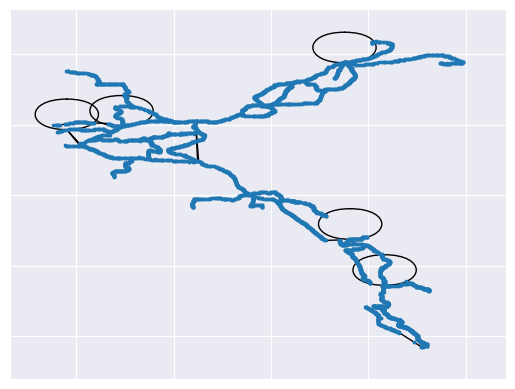

In [41]:
nx.draw_networkx(G, pos = pos, node_size = 4,node_shape='s',with_labels=False)

In [19]:
#The appearance of the circles was unexpected and there was nothing we could find in the literature that may be able to 
#explian why those circles were appearing and what could be done about them. 
nx.write_edgelist(G,'../data/processed/NetworkG.edgelist') 
nx.write_edgelist(G,'../data/processed/NetworkG.csv',delimiter=',') 

In [20]:
shortestpath_dict = {}

def find_shortest_path(graph, a,b):
    if (a,b) in shortestpath_dict:
        p = shortestpath_dict[(a,b)]
    else:
        p = nx.shortest_path(graph, source=a, target=b, weight = 'weight')
        shortestpath_dict.update({(a,b):p})
    return p

In [21]:
sourcesinks


,index,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,0,N1,1000,sourcesink,NaN,SoSi1,23.706028,90.443333,0.0,NaN
1,1781,N102,2782,sourcesink,NaN,SoSi2,24.050611,91.114667,549.0,NaN
2,1912,N104,2913,sourcesink,NaN,SoSi3,22.825749,91.101444,120.0,NaN
3,2875,N2,3995,sourcesink,NaN,SoSi4,25.157056,92.017638,256.0,NaN
4,3167,N207,4289,sourcesink,NaN,SoSi5,24.626333,91.677527,350.0,NaN
5,3539,R151,4688,sourcesink,NaN,SoSi6,22.708222,91.784083,80.0,NaN
6,3801,R170,4950,sourcesink,NaN,SoSi7,21.752167,92.007833,67.0,NaN
7,4309,R240,5647,sourcesink,NaN,SoSi9,24.593805,91.610472,1250.0,NaN
8,4310,R250,5771,sourcesink,NaN,SoSi12,24.886000,91.868138,0.0,NaN
9,4540,R250,6001,sourcesink,NaN,SoSi13,24.873138,92.365028,315.0,NaN


In [22]:
find_shortest_path(G,6002,6083)

[6002,
 6003,
 6004,
 6005,
 6006,
 6007,
 6008,
 6009,
 6010,
 6011,
 6012,
 6013,
 6014,
 6015,
 6017,
 6018,
 6019,
 6020,
 6021,
 6022,
 6023,
 6024,
 6025,
 6026,
 6027,
 6028,
 6029,
 6030,
 6031,
 6032,
 6033,
 6034,
 6035,
 6036,
 6037,
 6038,
 6039,
 6040,
 6041,
 6042,
 6043,
 6044,
 6045,
 6046,
 6047,
 6048,
 6049,
 6050,
 6051,
 6052,
 6053,
 6054,
 6055,
 6056,
 6057,
 6058,
 6059,
 6060,
 6061,
 6062,
 6063,
 6064,
 6065,
 6066,
 6067,
 6068,
 6069,
 6070,
 6071,
 6072,
 6073,
 6074,
 6075,
 6076,
 6077,
 6078,
 6079,
 6080,
 6081,
 3097,
 3098,
 3099,
 3100,
 3101,
 3102,
 3103,
 3104,
 3105,
 3106,
 3107,
 3108,
 3109,
 3110,
 3111,
 3112,
 3113,
 3114,
 3115,
 3116,
 3117,
 3118,
 3119,
 3120,
 3121,
 3122,
 3123,
 3124,
 3125,
 3126,
 3127,
 3128,
 3129,
 3130,
 3131,
 3132,
 3133,
 3134,
 3135,
 3136,
 3137,
 3138,
 3139,
 3140,
 3141,
 6175,
 6174,
 6173,
 6172,
 6171,
 6170,
 6169,
 6168,
 6167,
 6166,
 6165,
 6164,
 6163,
 6162,
 6161,
 6160,
 6159,
 6158,
 6157,

In [23]:
found = 0
not_found = 0
for i, row in sourcesinks.iterrows():
    for j in range(1,len(sourcesinks)):
        try:
            find_shortest_path(G,row['id'],sourcesinks.iloc[j,2])
            #print("found path between",row['road'], "and", sourcesinks.iloc[j,1])
            found +=1
        except:
            print("could not find a path between",row['road'], "and", sourcesinks.iloc[j,1])
            not_found +=1
print(not_found/found*100,"percent of the paths could not be found")

0.0 percent of the paths could not be found


#### Run NetworkAnalysis.py BEFORE proceeding past this step

In [42]:
bridgemetrics = pd.read_csv("../data/output/network_metrics.csv")
inters=pd.read_csv("../data/output/network_intersection_metrics.csv")

In [25]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [26]:
# Sort the degree dictionairy and show the ten nodes with the highest degrees
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

Top 10 nodes by degree:
(6015, 6)
(6956, 6)
(7716, 6)
(3141, 6)
(5776, 6)
(1950, 5)
(2756, 4)
(3478, 4)
(3679, 4)
(5786, 4)


In [48]:
test = nx.to_pandas_edgelist(G)
test.loc[test['source'] == test['target']]

,source,target,weight
21,6015,6015,102.0
712,7716,7716,20.0
970,1950,1950,28.0
2041,3141,3141,75.0
2741,5776,5776,42.0


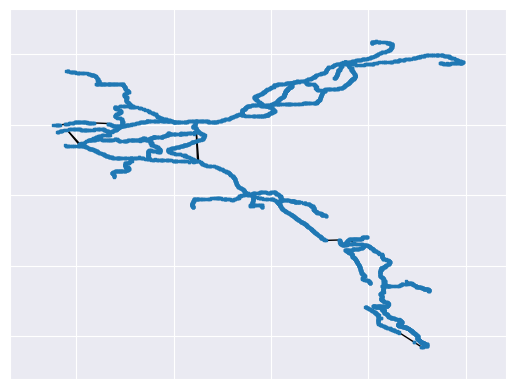

In [49]:
G.remove_edge(6015, 6015)
G.remove_edge(7716, 7716)
G.remove_edge(1950, 1950)
G.remove_edge(3141, 3141)
G.remove_edge(5776, 5776)

nx.draw_networkx(G, pos = pos, node_size = 4,node_shape='s',with_labels=False)

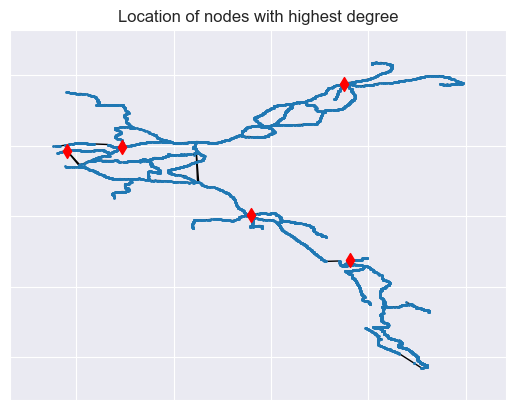

In [52]:
# Draw graph with highest degree hubs
Gsub = G.subgraph([6015,6956,7716,3141,5776])
nx.draw_networkx(G,pos, with_labels = False, node_size = 1)
nx.draw_networkx(Gsub,pos,node_color = 'red', node_shape = 'd', with_labels = False, node_size = 50)
plt.title('Location of nodes with highest degree')
plt.savefig('location.png')

In [33]:
df_between = bridgemetrics.sort_values('betweenness_centrality', ascending = False)
between = df_between.drop(df_between[df_between.betweenness_centrality < 0.45].index)
# Check
between.head(15)

,road,id,condition,bridge_name,betweenness_centrality,closeness_centrality,degreecentrality_centrality
65,N1,1213,A,AMTOLI SLAB CULVERT,0.485826,0.001788,0.000342
66,N1,1217,A,DHANPUR RCC GIDER BRIDGE,0.485594,0.001786,0.000342
67,N1,1229,B,PADUAR BAZER RCCGIDER,0.484886,0.001780,0.000342
68,N1,1231,C,Mostapur Bridge,0.484767,0.001779,0.000342
69,N1,1238,A,RAZAPARA RCC GIDER BRIDGE,0.484345,0.001775,0.000342
70,N1,1244,A,SUAGAZI RCC GIDER BRIDGE,0.483978,0.001771,0.000342
71,N1,1252,C,LAL BAG RCC GIDER BRIDGE,0.483483,0.001767,0.000342
72,N1,1254,A,CHANSIRI BOXCUIVERT,0.483358,0.001766,0.000342
73,N1,1264,A,MIABAZAR BOX CULVERT,0.482726,0.001760,0.000342
74,N1,1266,B,DOLL BARI CULVERT,0.482599,0.001759,0.000342


In [37]:
# Generate list based on df, for drawing the graph
b_list = []
b_list = between['id']

65    1213
66    1217
67    1229
68    1231
69    1238
      ... 
60    1196
61    1198
62    1201
64    1208
63    1207
Name: id, Length: 88, dtype: int64

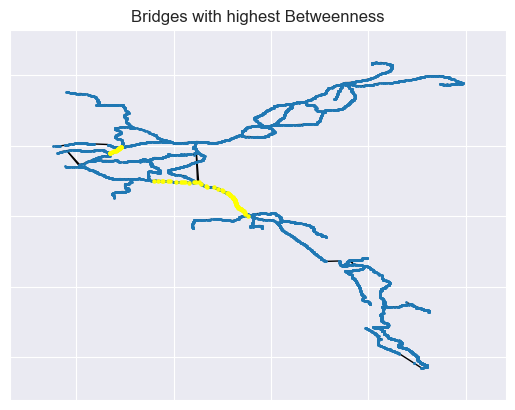

In [55]:
# Draw graph with betweenness areas, using the list based on threshold > 0.45
Gsub = G.subgraph(b_list)
nx.draw_networkx(G,pos, with_labels = False, node_size = 1)
nx.draw_networkx(Gsub,pos,node_color = 'yellow', with_labels = False, node_size = 5)
plt.title('Bridges with highest Betweenness')
plt.savefig('Between.png')

In [36]:
# Check the count of the conditions of the 'high betweenness centrality' - bridges
between['condition'].value_counts()

B    41
A    40
C     7
Name: condition, dtype: int64

In [39]:
intersection.head()

,road,id,model_type,condition,name,lat,lon,length,bridge_name
0,N1,6015,intersection,NaN,NaN,23.930027,90.452583,260.0,NaN
1,N1,1133,intersection,NaN,NaN,23.530805,90.781110,815.0,NaN
2,N1,1157,intersection,NaN,NaN,23.513111,90.870638,42.0,NaN
3,N1,1158,intersection,NaN,NaN,23.512667,90.871416,102.0,NaN
4,N1,1209,intersection,NaN,NaN,23.478972,91.117999,28.0,NaN


In [44]:
inters_between = inters.sort_values('betweenness_centrality', ascending = False)
interbetween = inters_between.drop(inters_between[inters_between.betweenness_centrality < 0.45].index)
interbetween.head()

,road,id,condition,bridge_name,betweenness_centrality,closeness_centrality,degreecentrality_centrality
19,N102,2756,NaN,NaN,0.513072,0.001789,0.000684
6,N1,2756,NaN,NaN,0.513072,0.001789,0.000684
74,Z1031,6956,NaN,NaN,0.496662,0.001692,0.001027
76,Z1034,6956,NaN,NaN,0.496662,0.001692,0.001027
7,N1,6956,NaN,NaN,0.496662,0.001692,0.001027
